# Project Overview
In this project, you will apply your data science and machine learning skills to develop a predictive model for Easy Visa Dataset. This project will involve data cleaning, exploratory data analysis (EDA), data preprocessing, model training,hyperparameter tuning and evaluation. 

## Phase 1: Data Collection and Preparation

In [29]:
# Importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stat 

### Task 1.1: Load the dataset from here.


In [30]:
path="https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/EasyVisa%20(1).csv"
# function to load data
def load_data(file_path):
    try:
        data=pd.read_csv(file_path)
        return data
    except FileNotFoundError as e:
        print (f"File error: {e}")


### Task 1.2: Load the dataset into a Pandas DataFrame.


In [31]:
data= load_data(path)
df= data.copy() #making the copy of the data
df.head(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified



### Task 1.3: Inspect the dataset for missing values and handle them appropriately.


In [32]:
df.isnull().sum()
# df.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64


### Task 1.4: Perform data cleaning to ensure the dataset is ready for analysis.

In [33]:
# let drop case_id so as not to disturb our operatiuon
df=df.drop(columns=["case_id"])
df
#  nothing to clean for now

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


**Nothing to clean for now**

## Phase 2: Exploratory Data Analysis (EDA)



### Task 2.1: Conduct exploratory data analysis to understand the distribution of features and the target variable .


In [34]:

#  let check the data description
print()
print("The data Description")
print("--"*30)
print(df.describe())


The data Description
------------------------------------------------------------
       no_of_employees   yr_of_estab  prevailing_wage
count     25480.000000  25480.000000     25480.000000
mean       5667.043210   1979.409929     74455.814592
std       22877.928848     42.366929     52815.942327
min         -26.000000   1800.000000         2.136700
25%        1022.000000   1976.000000     34015.480000
50%        2109.000000   1997.000000     70308.210000
75%        3504.000000   2005.000000    107735.512500
max      602069.000000   2016.000000    319210.270000


In [35]:
#  let show value count for our categorical
cat_col= df.select_dtypes('object').columns
print()
print("The value count for our categorical")
for col in cat_col:
    print(df[col].value_counts())
    print("--"*30)



The value count for our categorical
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
------------------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
------------------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
------------------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
------------------------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
------------------------------------------------------------
unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name:


### Task 2.2: Visualize the relationships between features and the target variable using scatter plots, histograms, and box plots.


#### Histograms, and box plots

In [36]:
def histogram_boxplot(df, feature):
    plt.figure(figsize=(12,5))

    # histogram
    plt.subplot(1,2,1)
    sns.histplot(data=df, x=feature, kde=True, bins=30)
    plt.title(f"\nDistribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Fequency")

    # boxplot
    plt.subplot(1,2,2)
    sns.boxplot(data=df, x=feature)
    plt.title(f"\nBox plot of {feature}")

    plt.tight_layout
    plt.show()

    skewness= df[feature].skew()
    print(f"The {feature} skewness is: {skewness:.2f}")
    print("--"*50)
    print()
    # if abs(skewness) > 


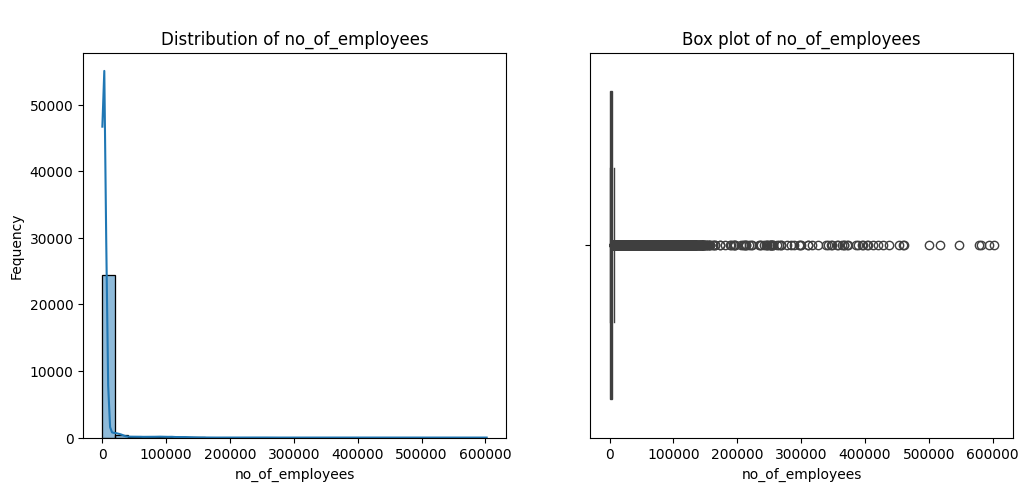

The no_of_employees skewness is: 12.27
----------------------------------------------------------------------------------------------------



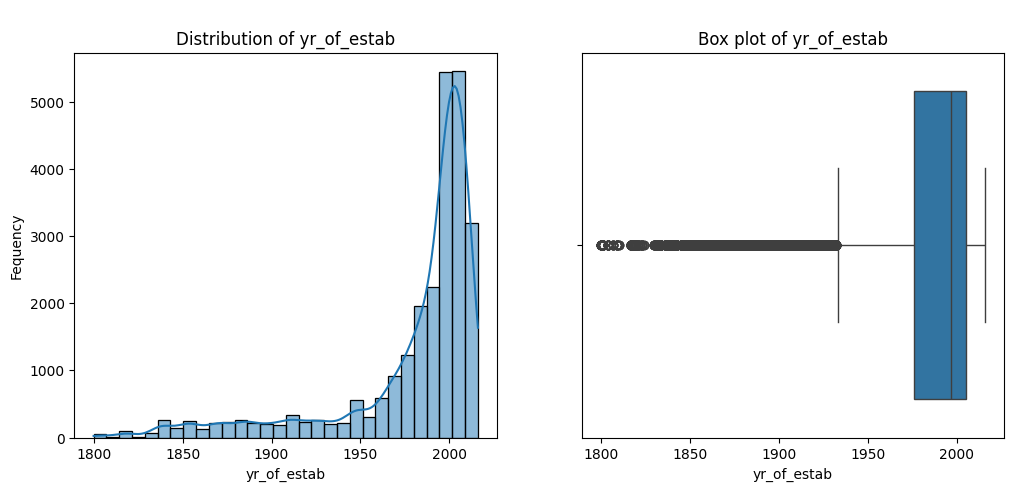

The yr_of_estab skewness is: -2.04
----------------------------------------------------------------------------------------------------



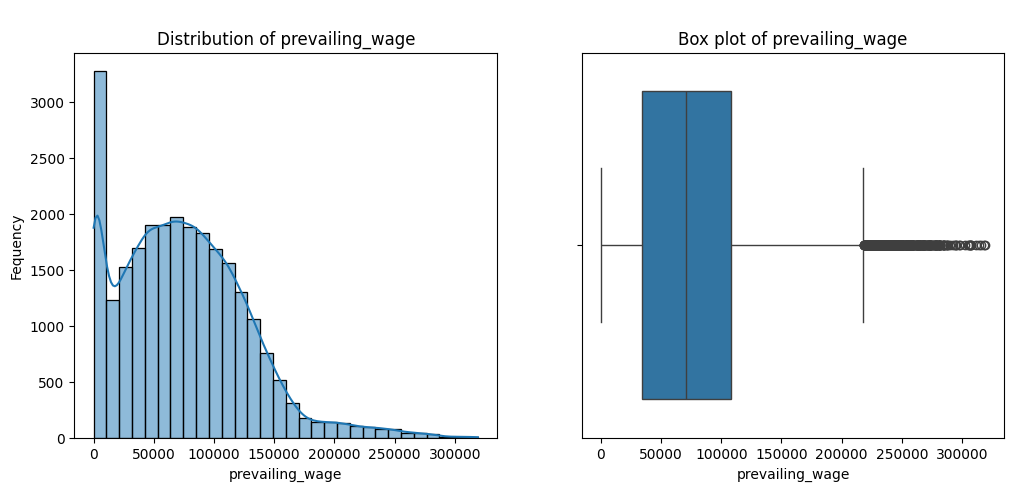

The prevailing_wage skewness is: 0.76
----------------------------------------------------------------------------------------------------



In [37]:
# histogram_boxplot(df,"no_of_employees") #test with one first
num_col= df.select_dtypes(include="number") #getting the numerical features
for col in num_col:
    histogram_boxplot(df,col)

from above visualisation 
|features |skew|outliers|
|---------|----|--------|
|no_of_employees|rightly skewed|possibly present
|yr_of_estab|slightly left skewed|possibly present
|prevailing_wage|moderately skewed|possibly present

### checking the distribution of category

In [38]:
def category_distribution(df, cat_col):
    # corr = df[feature].corrwith(target)
    for col in cat_col:
        plt.figure(figsize=(6,4))
        sns.countplot(data=df, x=df[col], hue=col)
        plt.title(f"Distribution of {col}")


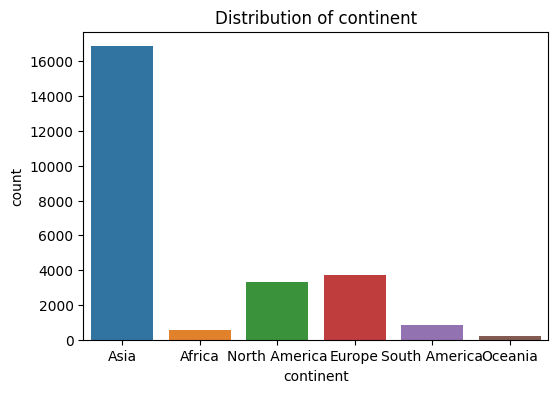

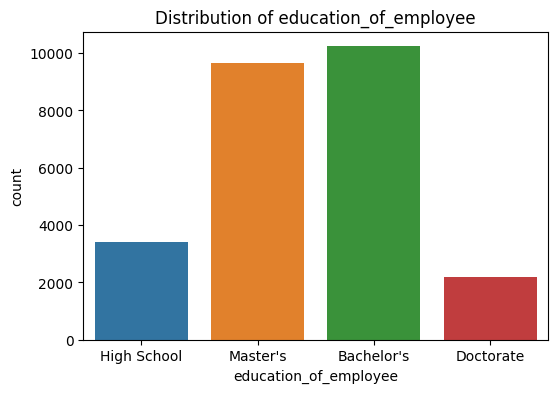

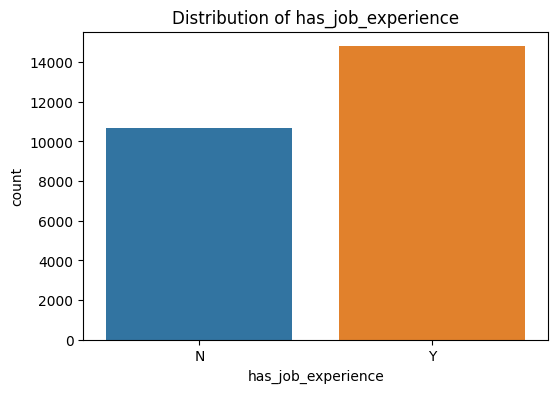

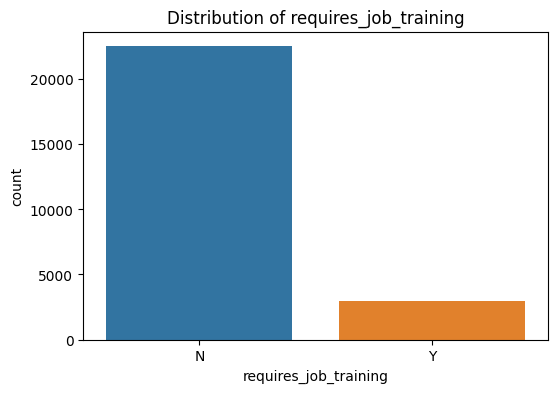

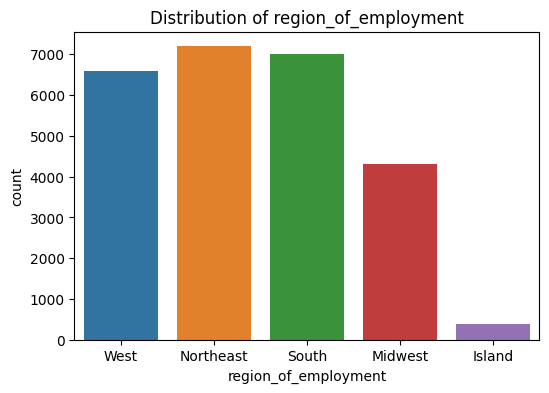

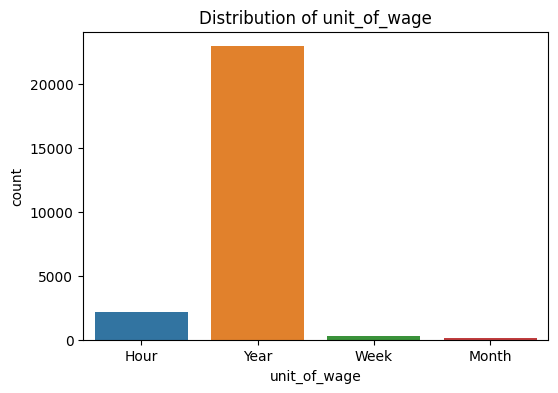

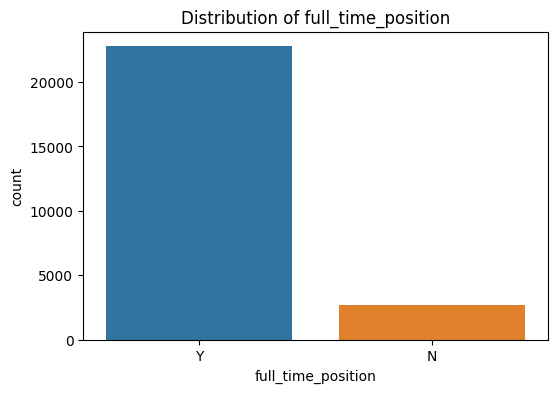

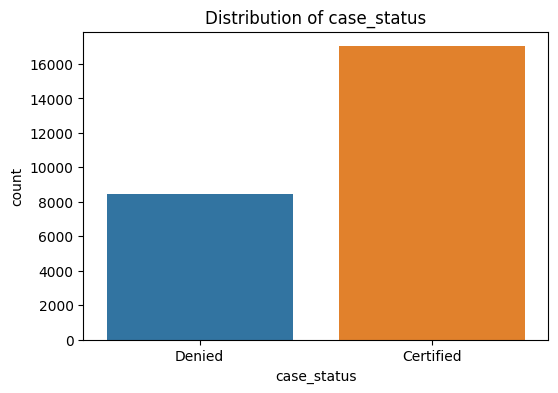

In [39]:
category_distribution(df, cat_col)

#### Comparism among numerical feature

In [40]:
from scipy.stats import pearsonr
def scatterplot(df, feature1, feature2):
    corr, p_val= pearsonr(df[feature1], df[feature2])
    # print(f"The correlation of {feature1} and {feature2} is: {corr}")
    # print("--"*50)
    plt.figure(figsize=(6,4))
    sns.regplot(data=df, x=feature1, y=feature2, line_kws ={'color':'red'})
    plt.title(f"The correlation of {feature1} and {feature2} is: {corr:.2f} \n with p_value of: {p_val:.2f}")

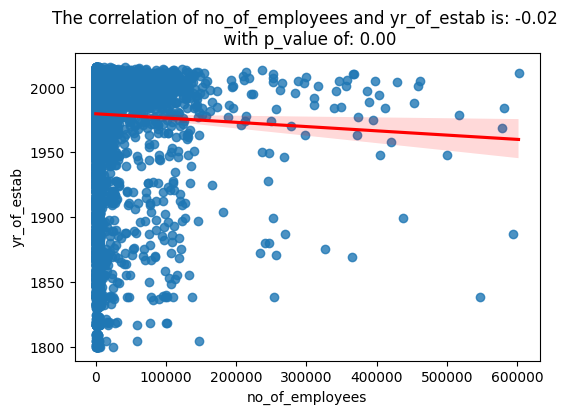

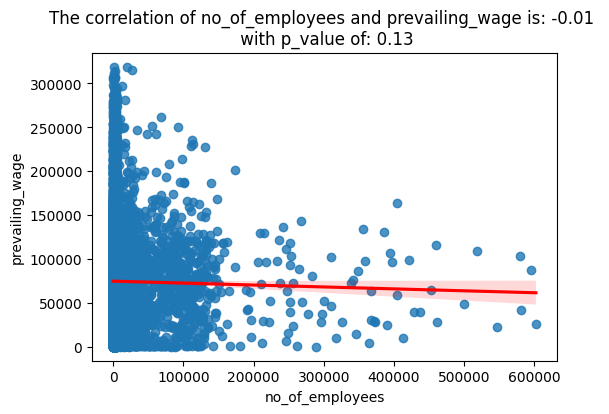

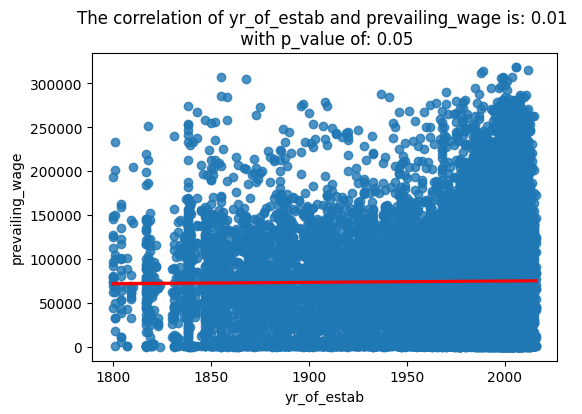

In [41]:
import itertools
for f1,f2 in itertools.combinations(num_col,2):
    scatterplot(df,f1,f2)

In [42]:
def scatterplot_trivariate(df, feature1, feature2):
    # corr= df[feature1].corr(df[feature2])
    # colors=['red' if corr<0 else 'blue']
    # print(f"The correlation of {feature1} and {feature2} is: {corr}")
    # print("--"*50)
    plt.figure(figsize=(6,4))
    sns.lmplot(data=df, x=feature1, y=feature2, hue="case_status", line_kws ={'color':'red'})

<Figure size 600x400 with 0 Axes>

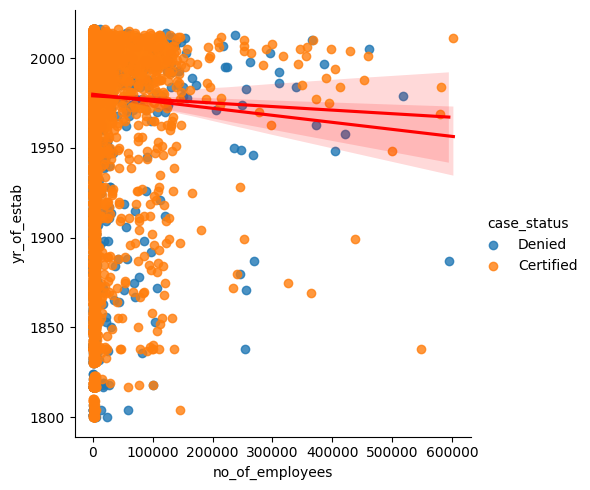

<Figure size 600x400 with 0 Axes>

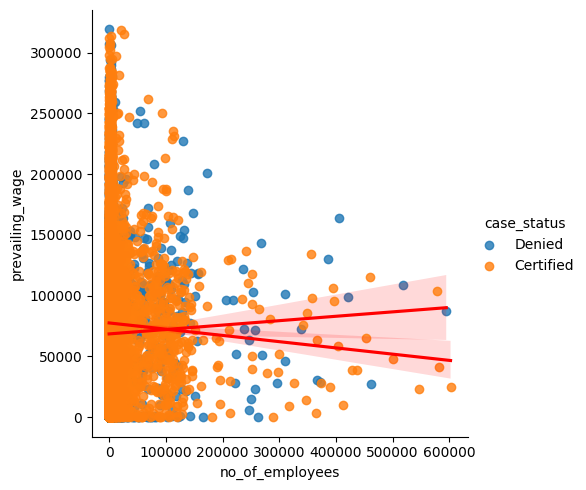

<Figure size 600x400 with 0 Axes>

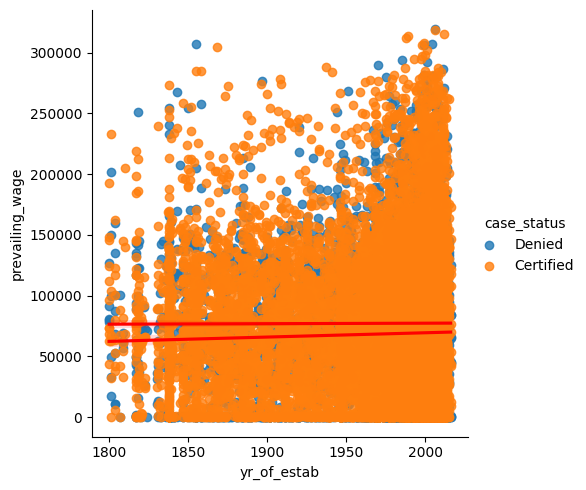

In [43]:
import itertools
for f1,f2 in itertools.combinations(num_col,2):
    scatterplot_trivariate(df,f1,f2)

In [44]:
# numerical data correllation with target
df_corr= df.copy()# copy for correlation purpose
# first let covert case _status to numerical
df_corr['case_status']=  df_corr['case_status'].map({"Certified":1, "Denied":0})
df_corr

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,0
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1
...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,1
25476,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,1
25477,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,1
25478,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,1


In [52]:
# check the correclation
def feature_target_corr(df_corr,target):
    corr= num_col.corrwith(df[target])
    # df_corr= pd.DataFrame(corr.round(2), columns=["Correlation"])
    df_corr=corr.to_frame(name="corr").T

    # heatmap
    plt.figure(figsize=(10,2))
    sns.heatmap(df_corr,annot=True,fmt=".3f",cmap="coolwarm",center=0,vmin=-1,vmax=1,cbar_kws={'orientation': 'vertical', 'shrink':0.7})
    plt.xticks(rotation=45, ha='right')
    plt.yticks([0], ["case_status"], rotation=0)
    plt.title("Correlation of Numeric Features with case_status", fontsize=12)
    plt.tight_layout()


In [ ]:
feature_target_corr(df_corr,"case_status")

ValueError: could not convert string to float: 'Denied'